# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
# YOUR CODE HERE
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
inspector = inspect(engine)

In [6]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = inspector.get_columns('emoji')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [7]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE
engine.execute('select * from emoji limit 10').fetchall()

[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect database and Query

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [9]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [10]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
# YOUR CODE HERE
results=[]
result = session.query(Emoji)
for r in result:
    r=[r.emoji_char, r.emoji_id, r.score]
    results.append(r)


Unpack tuples using list comprehensions

In [11]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
# YOUR CODE HERE
results=pd.DataFrame(results)
emoji_char=results[1].head(10)
scores=results[2].head(10)
emoji_char

0    1F602
1     2764
2    1F60D
3     2665
4    1F62D
5    1F60A
6     267B
7    1F612
8    1F495
9    1F618
Name: 1, dtype: object

## Plot using Matplotlib

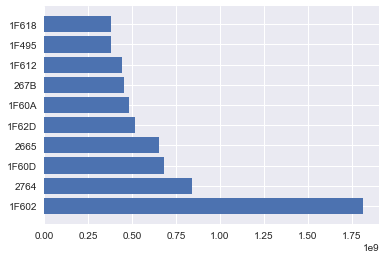

In [12]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE
plt.barh(emoji_char,scores)
plt.show()



## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [13]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df=results.set_index(1)
df.head(10)


,0,2
1,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
1F60A,😊,484540701
267B,♻️,452489849
1F612,😒,441690175
1F495,💕,381679908


Plot using Pandas

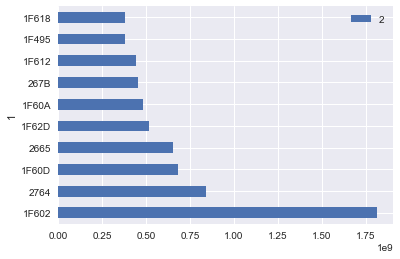

In [14]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE
df.head(10).plot(kind="barh")


In [15]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE
conn = engine.connect()
read_sql_query=pd.read_sql('SELECT * FROM emoji',conn)

In [16]:
read_sql_query

,id,emoji_char,emoji_id,name,score
0,1,😂,1F602,FACE WITH TEARS OF JOY,1814832150
1,2,❤️,2764,HEAVY BLACK HEART,840619939
2,3,😍,1F60D,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,4,♥️,2665,BLACK HEART SUIT,652715459
4,5,😭,1F62D,LOUDLY CRYING FACE,515991922
...,...,...,...,...,...
840,841,🛂,1F6C2,PASSPORT CONTROL,103654
841,842,🔠,1F520,INPUT SYMBOL FOR LATIN CAPITAL LETTERS,103234
842,843,🔡,1F521,INPUT SYMBOL FOR LATIN SMALL LETTERS,101160
843,844,🚱,1F6B1,NON-POTABLE WATER SYMBOL,92412
